<a href="https://colab.research.google.com/github/viniVN7/Mineracao-De-Dados/blob/main/Projeto_Mineracao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.tree import DecisionTreeClassifier

In [4]:
url = 'https://raw.githubusercontent.com/viniVN7/Mineracao-De-Dados/main/Projeto/Bank%20Customer%20Churn%20Prediction.csv'
df = pd.read_csv(url, sep=',', encoding = 'latin1')

In [ ]:
df.head()

# **Quantidade de linhas e colunas**

In [ ]:
df.info()

# Quantidade de clientes por país

In [ ]:
df['country'].value_counts()

# Média de idade dos clientes

In [8]:
df['age'].mean()

38.9218

In [ ]:
#verificando se há valores repetidos
df.loc[df['customer_id'] == df['customer_id'].duplicated()]

In [ ]:
df.drop('customer_id', 1, inplace=True)
df.describe()

In [ ]:
#total de clientes que possuem cartão de crédito
df[df['credit_card'] == 1].shape[0]

In [ ]:
#Quantidade de clientes que possuem cartão de crédito por país
df[df['credit_card'] == 1].groupby('country').size()

In [ ]:
df['credit_score'].min()

In [ ]:
df['credit_score'].max()

In [15]:
df['credit_score'].median()

652.0

In [16]:
df['estimated_salary'].max()

199992.48

In [17]:
df['estimated_salary'].mean()

100090.239881

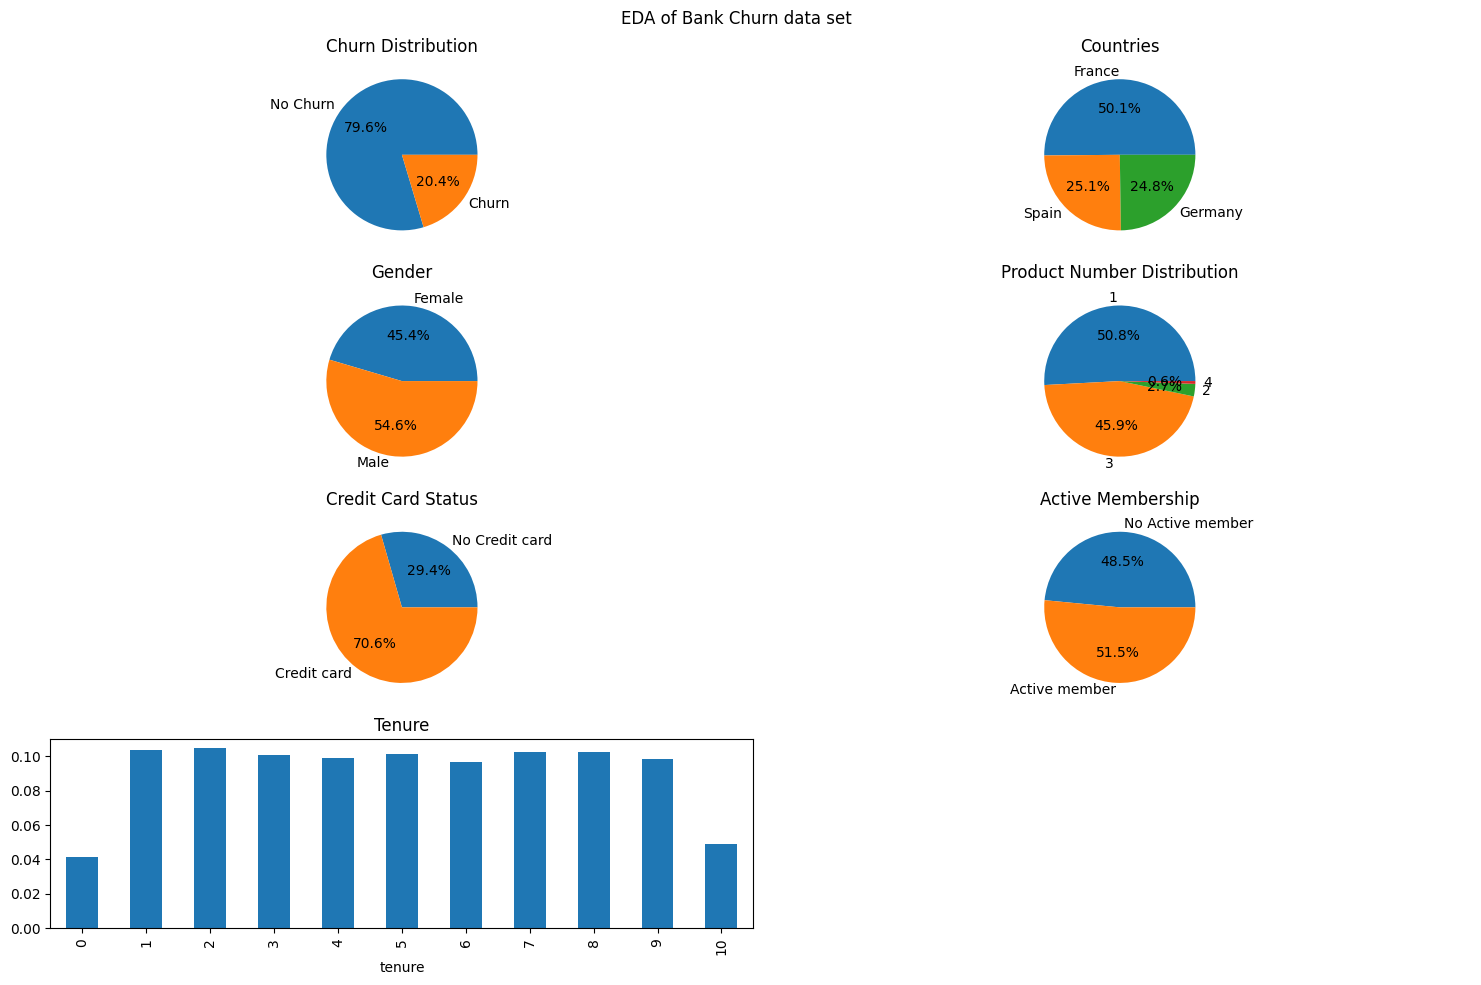

In [18]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(15, 10))

# Lista com os nomes das colunas para os gráficos de pizza
columns_pie = ['churn', 'country', 'gender', 'products_number', 'credit_card', 'active_member']
# Rótulos para os gráficos de pizza
labels_pie = [['No Churn', 'Churn'], df.country.unique(), df.gender.unique(), df.products_number.unique(), ['No Credit card', 'Credit card'], ['No Active member', 'Active member']]
# Títulos para os gráficos de pizza
titles_pie = ['Churn Distribution', 'Countries', 'Gender', 'Product Number Distribution', 'Credit Card Status', 'Active Membership']

# Gera os gráficos de pizza e o gráfico de barras
for i, column in enumerate(columns_pie):
    pd.crosstab(index=df[column], columns='count', normalize=True).plot(kind='pie', autopct='%.1f%%', y='count', labels=labels_pie[i], ylabel='', title=titles_pie[i], legend=False, ax=ax[i//2, i%2])
pd.crosstab(index=df.tenure, columns='count', normalize=True).plot(kind='bar', title='Tenure', legend=False, ax=ax[3, 0])
ax[3, 1].axis('off')

fig.suptitle('EDA of Bank Churn data set')
fig.subplots_adjust(hspace=0.5)

plt.tight_layout()


In [29]:
# Dividir o conjunto de dados em variáveis de entrada (X) e variável de saída (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Converter variáveis categóricas em representações numéricas usando codificação one-hot
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[['gender', 'country']])

# Concatenar as variáveis categóricas codificadas com as variáveis numéricas originais
X_final = pd.concat([X.drop(['gender', 'country'], axis=1), pd.DataFrame(X_encoded)], axis=1)

# Converter todas as colunas para o tipo de dados string
X_final.columns = X_final.columns.astype(str)

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_final)

# Dividir o conjunto de dados normalizado em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Instanciar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Avaliar a precisão do modelo
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Acurácia: 0.811
Precisão: 0.5524475524475524
Recall: 0.2010178117048346


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [30]:
#árvore

# Dividir o conjunto de dados em variáveis de entrada (X) e variável de saída (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Converter variáveis categóricas em representações numéricas usando codificação one-hot
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[['gender', 'country']])

# Concatenar as variáveis categóricas codificadas com as variáveis numéricas originais
X_final = pd.concat([X.drop(['gender', 'country'], axis=1), pd.DataFrame(X_encoded)], axis=1)

# Converter todas as colunas para o tipo de dados string
X_final.columns = X_final.columns.astype(str)

# Dividir o conjunto de dados final em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Instanciar o modelo de Árvore de Decisão
model = DecisionTreeClassifier()

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Avaliar a precisão do modelo
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Acurácia: 0.7805
Precisão: 0.44724770642201833
Recall: 0.4961832061068702


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [21]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 

# Dividir o conjunto de dados em variáveis de entrada (X) e variável de saída (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Converter variáveis categóricas em representações numéricas usando codificação one-hot
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X)

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_encoded)

# Dividir o conjunto de dados normalizado em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Instanciar o modelo Naive Bayes
model = GaussianNB()

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a accuracy do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)

# Avaliar a precisão do modelo
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Acurácia: 0.2245


In [25]:
# Dividir o conjunto de dados em variáveis de entrada (X) e variável de saída (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Converter variáveis categóricas em representações numéricas usando codificação one-hot
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[['gender', 'country']])

# Concatenar as variáveis categóricas codificadas com as variáveis numéricas originais
X_final = pd.concat([X.drop(['gender', 'country'], axis=1), pd.DataFrame(X_encoded)], axis=1)

# Converter todas as colunas para o tipo de dados string
X_final.columns = X_final.columns.astype(str)

# Normalizar os dados
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X_final)

# Dividir o conjunto de dados normalizado em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# Instanciar o modelo de regressão logística
model = LogisticRegression()

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)


Precisão: 0.5524475524475524


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [26]:
#árvore

# Dividir o conjunto de dados em variáveis de entrada (X) e variável de saída (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Converter variáveis categóricas em representações numéricas usando codificação one-hot
encoder = OneHotEncoder(sparse=False, drop='first')
X_encoded = encoder.fit_transform(X[['gender', 'country']])

# Concatenar as variáveis categóricas codificadas com as variáveis numéricas originais
X_final = pd.concat([X.drop(['gender', 'country'], axis=1), pd.DataFrame(X_encoded)], axis=1)

# Converter todas as colunas para o tipo de dados string
X_final.columns = X_final.columns.astype(str)

# Dividir o conjunto de dados final em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Instanciar o modelo de Árvore de Decisão
model = DecisionTreeClassifier()

# Treinar o modelo usando o conjunto de treinamento
model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliar a precisão do modelo
precision = precision_score(y_test, y_pred)
print("Precisão:", precision)



Precisão: 0.4383561643835616


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
